# 20 ways to take a numerical derivative of noisy data without being a jerk

This notebook walks through each of the methods implemented in pynumdiff.

Some notes on notation and syntax:
  * dt: (float) time step (note: we concentrated on differentiating timeseries data, however these functions work for a 1-dimensional spatial derivative as well)
  * x: (np.array with length N) the time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is known when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is known when the data is simulated, and used for plotting purposes only)

In [32]:
# external imports
import numpy as np

# local imports
import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

# 0. Simulate some data

pynumdiff comes with 6 different toy problems (choose the one that most resembles your data to see how the methods compare):
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* linear_autonomous: (linear) linear time invariant system: dxdt = Ax  
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [30]:
# simulation parameters

# noise is generated using np.random, e.g. np.random.normal, np.random.uniform, np.random.poisson
# noise_type and noise_parameters should be compatible with np.random functions 
noise_type = 'normal'
noise_parameters = [0, 0.1]

# time step and time series length
dt = 0.01
timeseries_length = 600 # steps

In [31]:
# simulate data

x, x_truth, dxdt_truth, extras = simulate.lorenz_x(dt=dt,
                                                   timeseries_length=timeseries_length,
                                                   noise_type=noise_type, 
                                                   noise_parameters=noise_parameters)

# 1. Finite Difference

### 1.1 Finite Difference: First Order

RMS error in velocity:  7.069626309720832


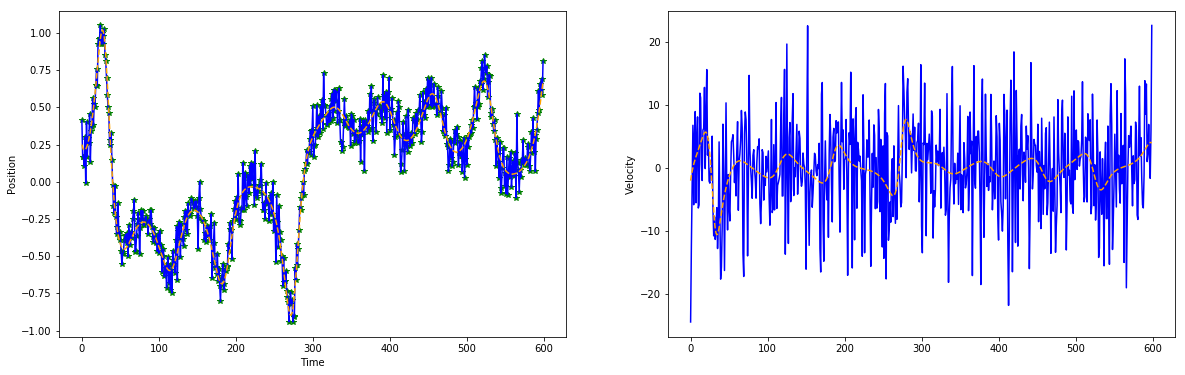

In [5]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.2 Finite Difference: Second Order

RMS error in velocity:  7.069626309720832


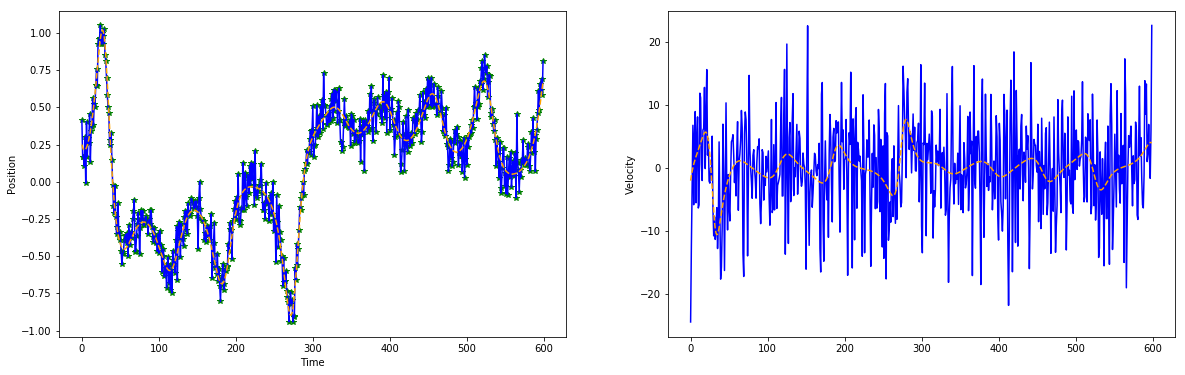

In [6]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 Finite Difference: Iterated First Order

RMS error in velocity:  0.7959888360941016


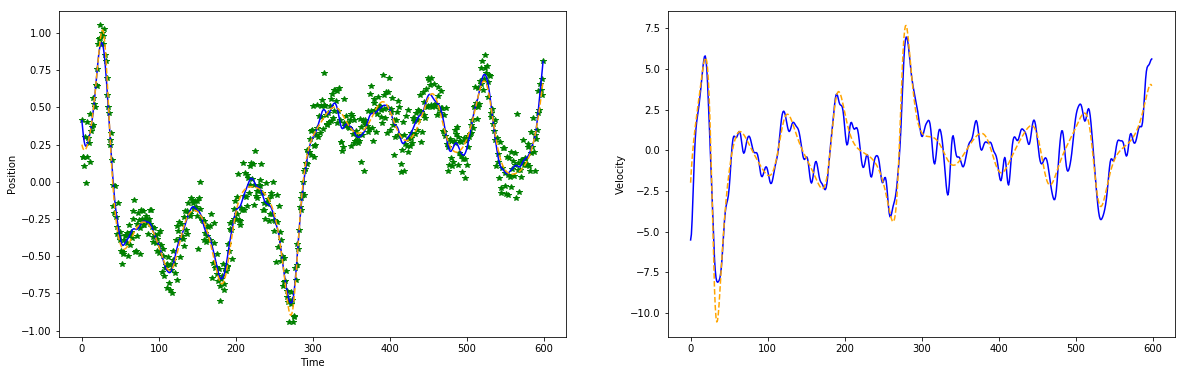

In [7]:
params = [20]
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

RMS error in velocity:  1.9106063947525243


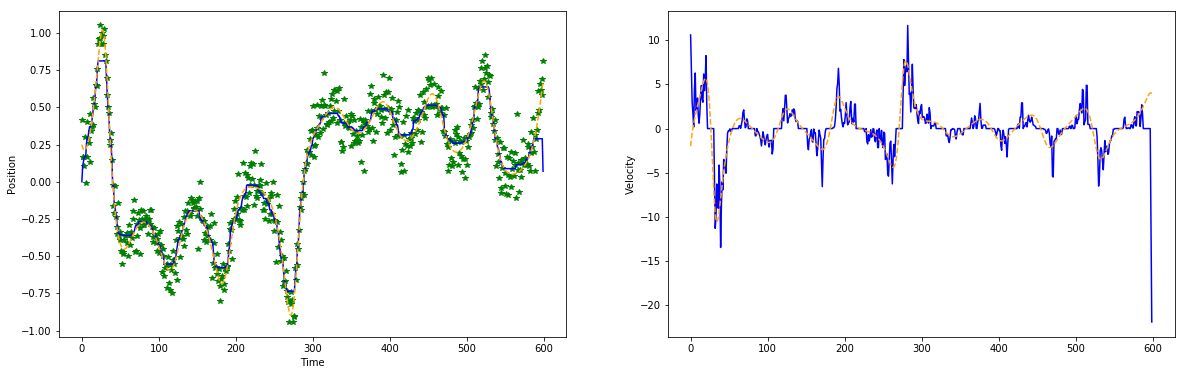

In [9]:
params = [20, 4]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.2 Smooth Finite Difference: Mean smoothing

RMS error in velocity:  1.094742993281566


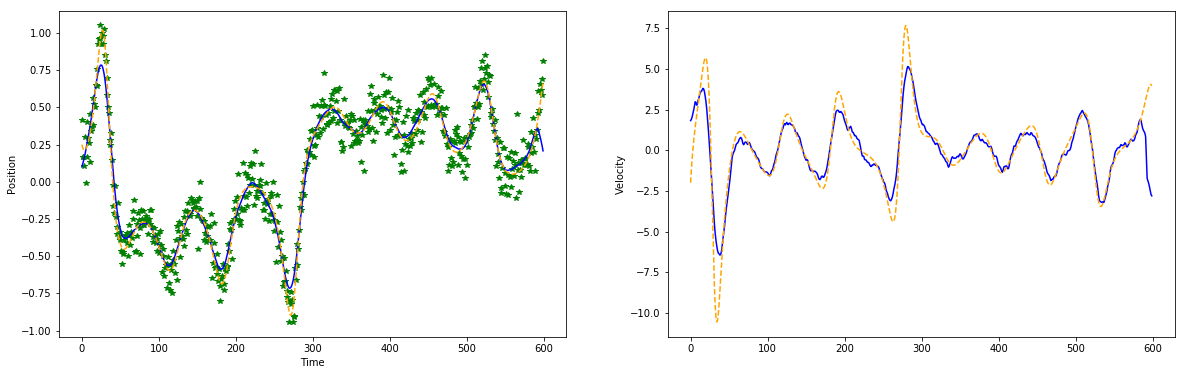

In [12]:
params = [15, 2]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.3 Smooth Finite Difference: Gaussian smoothing

RMS error in velocity:  0.9606194184394895


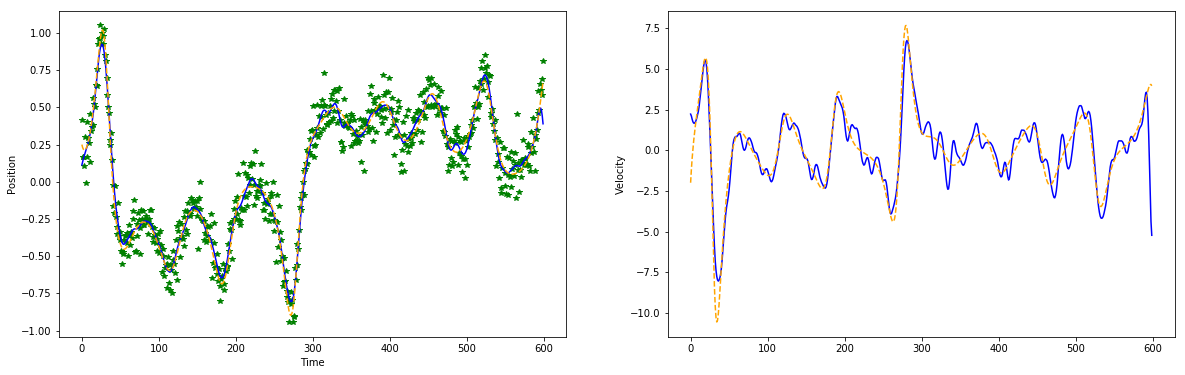

In [13]:
params = [20]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.4 Smooth Finite Difference: Friedrichs smoothing

RMS error in velocity:  0.9236711182712186


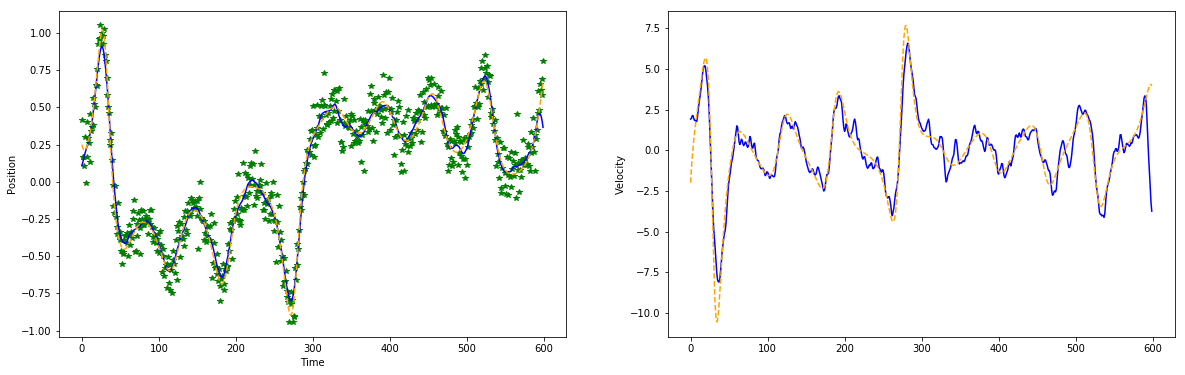

In [15]:
params = [20]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.5 Smooth Finite Difference: Butterworth smoothing

RMS error in velocity:  0.763710897140995


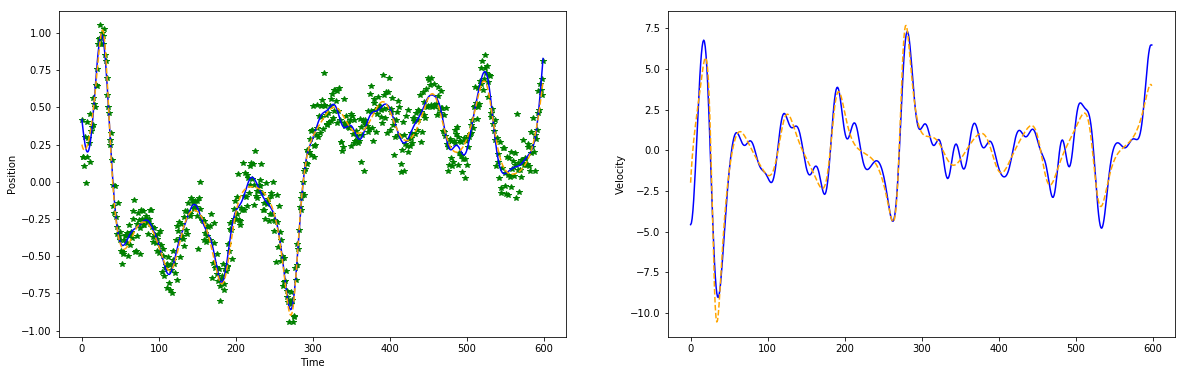

In [16]:
params = [6, 0.1]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.6 Smooth Finite Difference: Spline smoothing

RMS error in velocity:  1.199022934412578


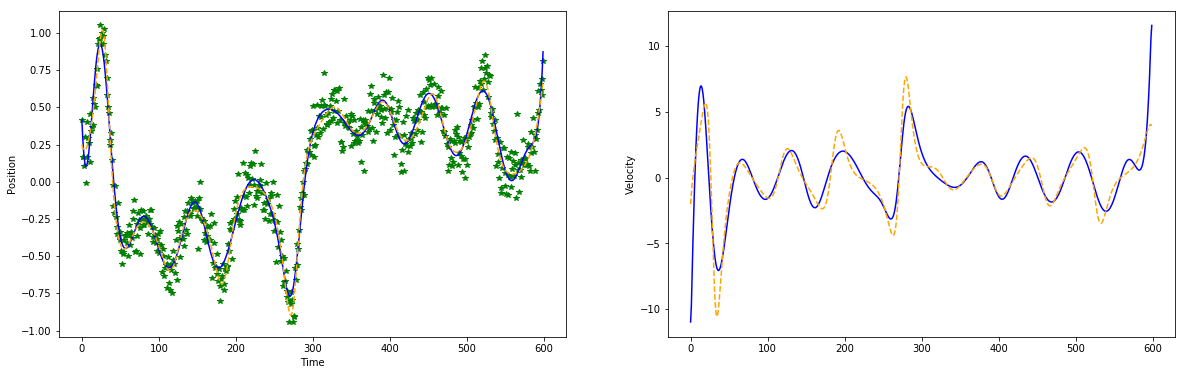

In [17]:
params = [5, 7]
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, params, options={'iterate': False})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 3. Total Variation Regularization

### 3.1 Total Variation Regularization: regularize velocity

RMS error in velocity:  0.8055580760343597


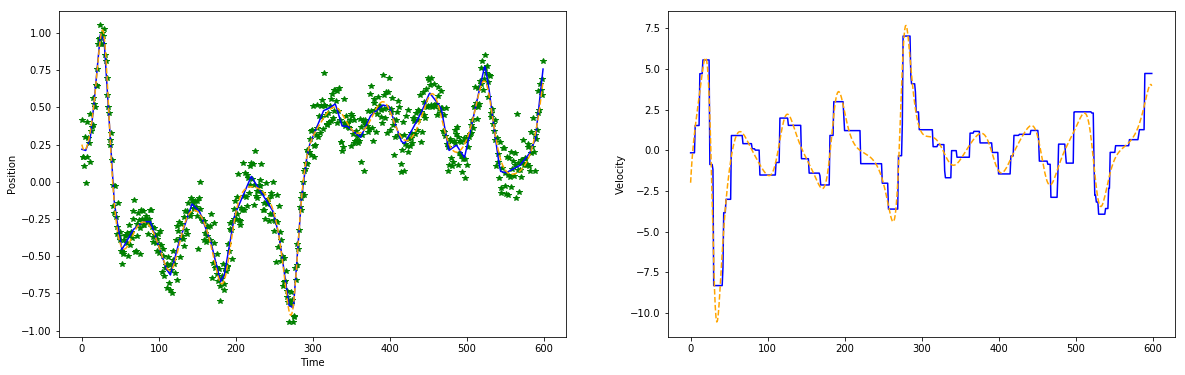

In [18]:
params = [1]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Total Variation Regularization: regularize acceleration

RMS error in velocity:  0.5029283488635746


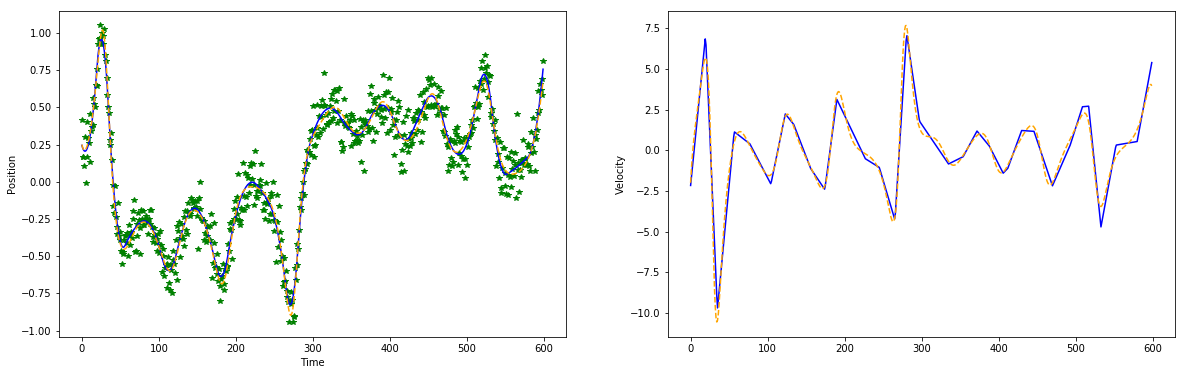

In [19]:
params = [10]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Total Variation Regularization: regularize jerk

RMS error in velocity:  0.7669240413804496


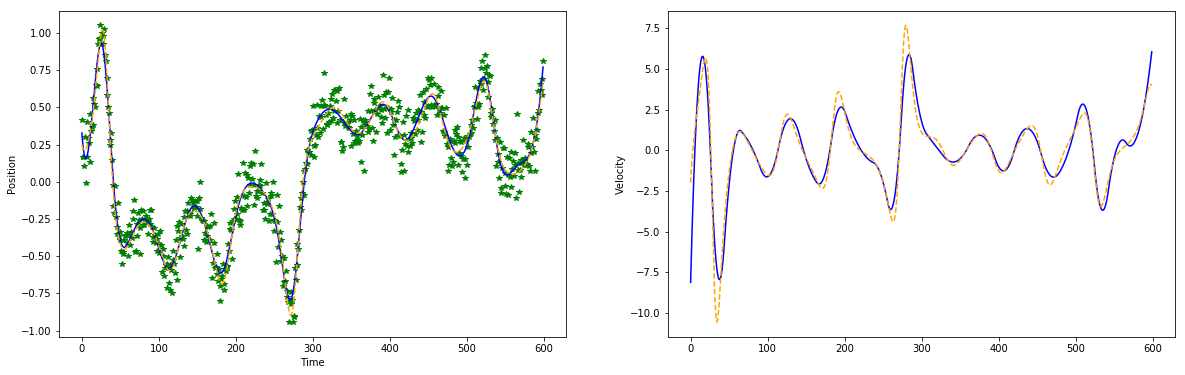

In [20]:
params = [100]
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 4. Linear Models

### 4.1 Linear Models: Spectral derivative

RMS error in velocity:  0.9759053817995396


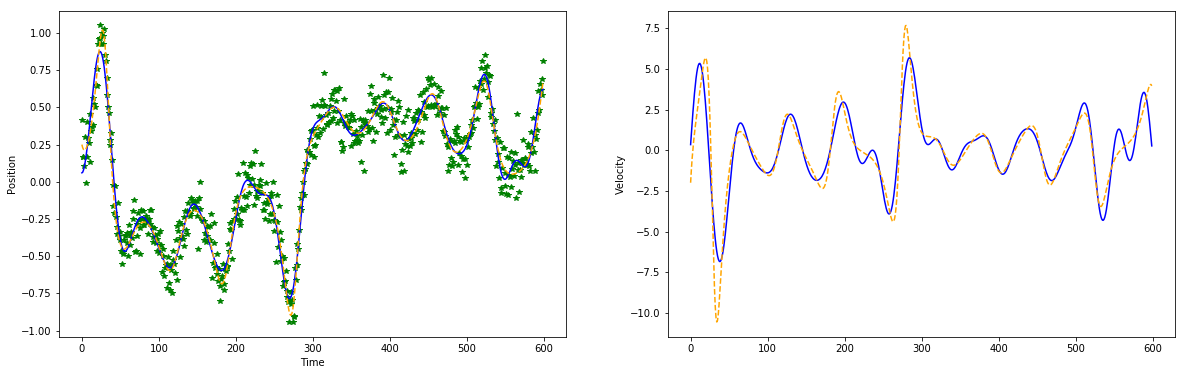

In [21]:
params = [0.03]
x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.2 Linear Models: Sliding polynomial fit

RMS error in velocity:  0.6498623422096063


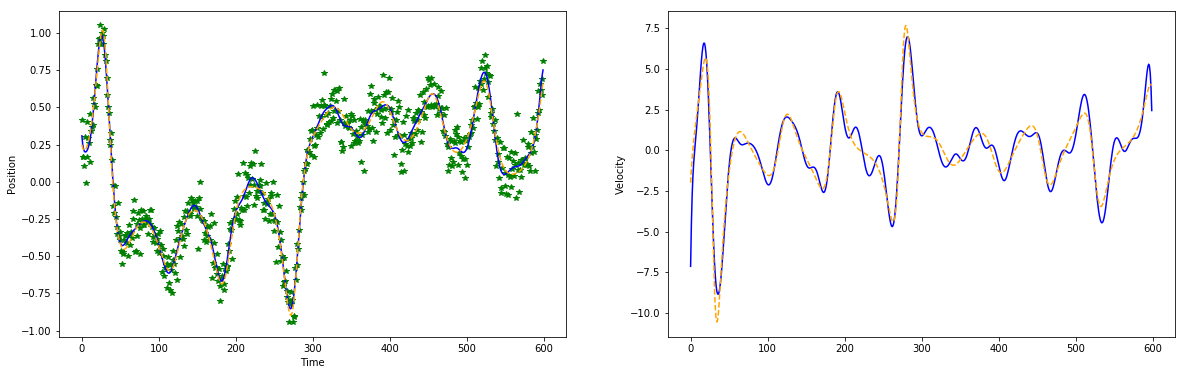

In [23]:
params = [6, 80]
x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.3 Linear Models: Sliding chebychev polynomial fit

RMS error in velocity:  1.1680232268383866


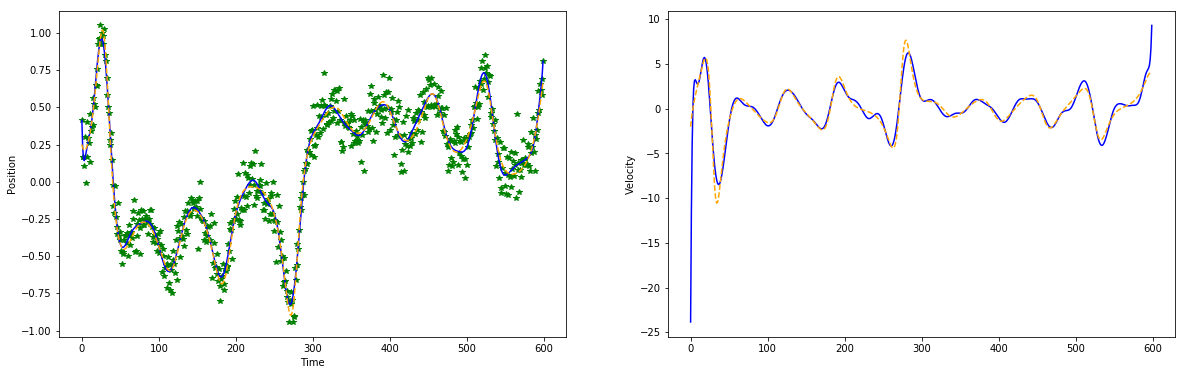

In [24]:
params = [6, 80]
x_hat, dxdt_hat = pynumdiff.linear_model.chebydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.4 Linear Models: Sliding dynamic mode decomposition fit

RMS error in velocity:  0.6801996630707129


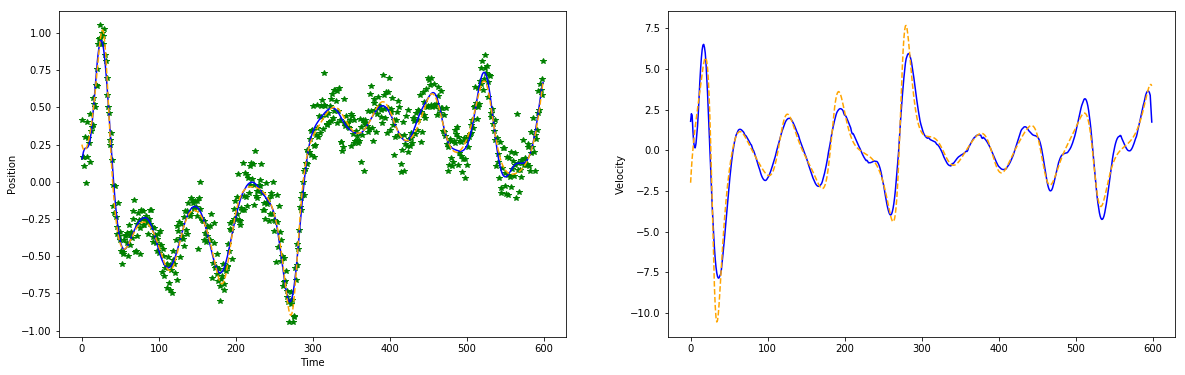

In [25]:
params = [100, 6, 80]
x_hat, dxdt_hat = pynumdiff.linear_model.dmddiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.5 Linear Models: Sliding linear time invariant system fit

RMS error in velocity:  1.2364128189876846


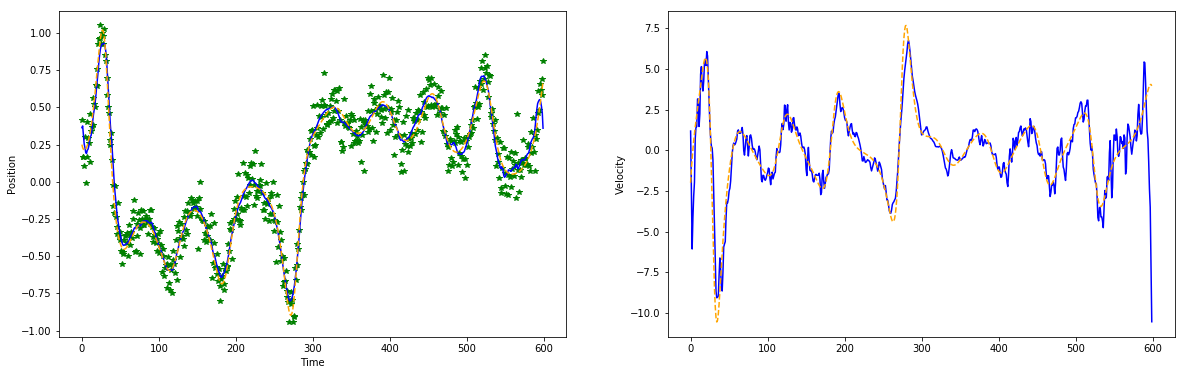

In [26]:
params = [3, 10, 40]
x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

RMS error in velocity:  1.0505997823730953


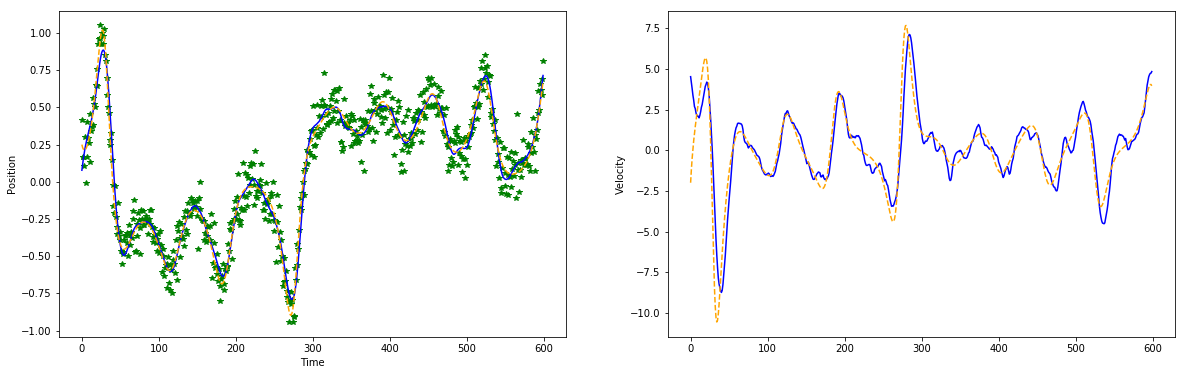

In [27]:
params = [noise_parameters[1]**2, 1e-2]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

RMS error in velocity:  0.6100211220313887


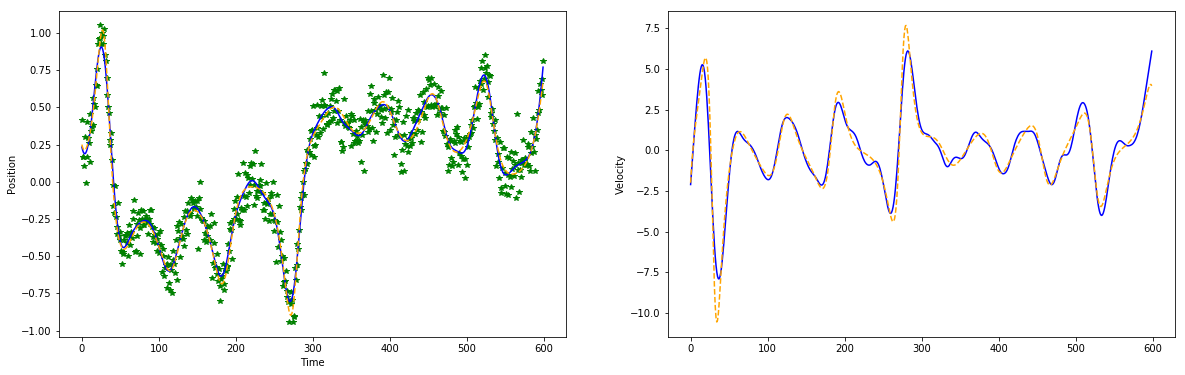

In [28]:
params = [noise_parameters[1]**2, 100]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.3 Kalman smoothing: constant jerk (forward-backward)

RMS error in velocity:  0.6489875335390087


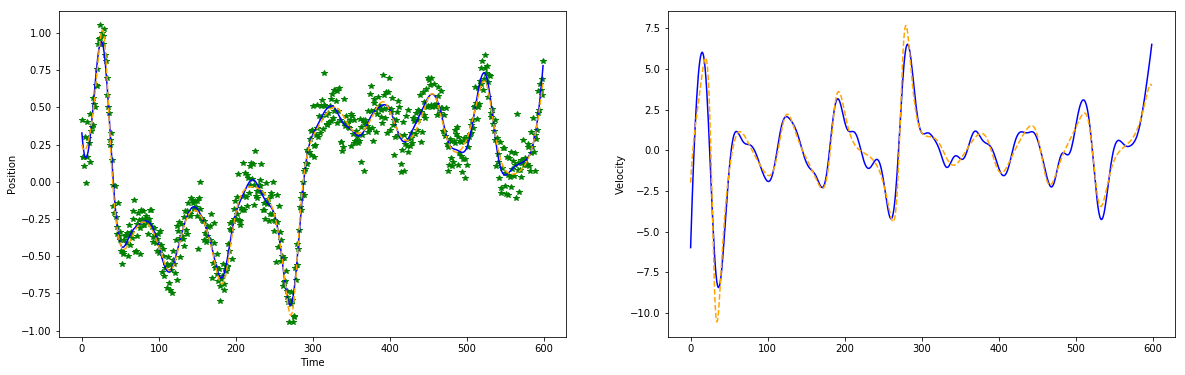

In [29]:
params = [noise_parameters[1]**2, 100000]
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)